# Optimisation de fonctions univariées

Considérons la fonction suivante à optimiser:
$$
f(x) = x^2 + x -2\sqrt{x}
$$

In [1]:
f(x) = x^2 + x - 2*sqrt(x)

f (generic function with 1 method)

Je viens de créer une superbe fonction! Voyons à quoi elle ressemble.

In [2]:
using Plots

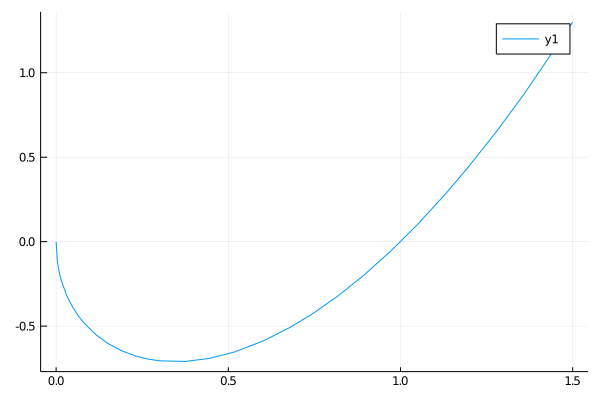

In [3]:
xmin = 0.0
xmax = 1.5
plot(f, xmin, xmax)

## Recherche aléatoire

Une approche naïve est de chercher au hasard un meilleur point. La méthode est facile à implémenter, mais elle inefficace.

In [4]:
# f: fonction à minimiser
# x0: point de départ
# nmax: nombre d'itération.
function randomsearch(f:: Function, x0:: Vector, nmax:: Int64)
    n = length(x0)
    x = copy(x0)
    value = f(x)
    
    for i = 1:nmax
        Δx = rand(n)
        xcand = x + Δx
        cand = f(xcand)
        if (cand < value)
            x = xcand
            value = cand
        end
    end
    
    return x, value
end

randomsearch (generic function with 1 method)

In [5]:
function f(x::Vector)
    return x[1] < 0 ? NaN : x[1]^2 + x[1] - 2*sqrt(x[1])
end

f (generic function with 2 methods)

In [6]:
x0 = [0.0]
randomsearch(f, x0, 1000)

([0.5680489169723393], -0.61665191015322)

In [7]:
x0 = [0.0]
randomsearch(f, x0, 1000000)

([0.36003179804601837], -0.7103983019228755)

Visuellement, la solution trouvée n'est pas très bonne et il est nécessaire de raffiner la recherche.

## Optimisation avec la méthode de Fibonacci

Calculons les nombres de Fibonacci.

In [8]:
N = 50
F = ones(N)

for i = 3:N
    F[i] = F[i-1] + F[i-2]
end

F

50-element Array{Float64,1}:
   1.0
   1.0
   2.0
   3.0
   5.0
   8.0
  13.0
  21.0
  34.0
  55.0
  89.0
 144.0
 233.0
   ⋮
   6.3245986e7
   1.02334155e8
   1.65580141e8
   2.67914296e8
   4.33494437e8
   7.01408733e8
   1.13490317e9
   1.836311903e9
   2.971215073e9
   4.807526976e9
   7.778742049e9
   1.2586269025e10

In [9]:
F[length(F)]

1.2586269025e10

Vérifions que le rapport entre les nombres de Fibonacci successifs converge vers le nombre d'or. Notons que Julia dispose de nombreuses constantes préimplémentées, donc le nombre d'or, disponible avec le nom `golden`.

In [10]:
Base.MathConstants.golden

φ = 1.6180339887498...

In [11]:
(1+sqrt(5))/2

1.618033988749895

Nous pouvons simplifier l'écrire en indiquant explicitement au préalable que nous souhaitons utiliser la librairie `Base.MathConstants`, mais il faudra veiller alors à ce que nos noms de variables n'entrent pas en conflit.

In [12]:
using Base.MathConstants

golden

φ = 1.6180339887498...

In [13]:
typeof(golden)

Irrational{:φ}

Calculons le rapport entre les deux derniers nombres générés à partir de la séquence de Fibonacci, et comparons-le au nombre d'or.

In [14]:
F[N]/F[N-1]-golden

0.0

Nous voyons ainsi que pour $N = 50$, numériquement, le rapport coïncide déjà au nombre d'or.

Revenons à notre problème d'optimisation et supposons que nous savons que la solution est dans [0,1].

In [15]:
xmin = 0
xmax = 1.0

verbose = true

true

In [16]:
typeof(xmin)

Int64

In [20]:
function fibonacci(g::Function, xmin:: Number, xmax, verbose::Bool = false)
    k = 1
    i = 1
    d = xmax - xmin
    xG = xmin+(F[N-2]/F[N])*d
    xD = xmin+(F[N-1]/F[N])*d
    fG = g(xG)
    fD = g(xD)
    ϵ = 0 # ne servira que pour la dernière itération

    if (verbose)
        println("Iteration $i.\nxmin = $xmin, xmax = $xmax")
        println("xG = $xG, fG = $fG")
        println("xD = $xD, fD = $fD")
        println("d = $d")
    end

    while (k < N-2)
        k += 1
        i += 1
        if k == N-3
            # On est à l'avant-dernière itération.
            # Poser ϵ à 0.1 permet d'éviter de mettre le nouveau point au milieu de l'intervalle.
            ϵ = 0.1
        end
        if fG < fD
            xmax = xD
            d = xmax - xmin
            xD = xG
            fD = fG
            xG = xmin+((F[N-k-1]/F[N-k+1])-ϵ)*d
            fG = g(xG)
        elseif fG > fD
            xmin = xG
            d = xmax - xmin
            xG = xD
            fG = fD
            xD = xmin+((F[N-k]/F[N-k+1])+ϵ)*d
            fD = g(xD)
        elseif fG == fD
            k += 1
            xmin = xG
            xmax = xD
            d = xmax - xmin

            xG = xmin+(F[N-k-1]/F[N-k+1])*d
            fG = g(xG)
            xD = xmin+(F[N-k]/F[N-k+1])*d
            fD = g(xD)
        end
        
        if verbose
            println("Iteration $i.\nxmin = $xmin, xmax = $xmax, $k = k")
            println("xG = $xG, fG = $fG")
            println("xD = $xD, fD = $fD")
            println("d = $d")
        end
    end
    
    if fG < fD
        xmax = xD
    end
    if fG > fD
        xmin = xG
    end
    
    println(k, " ", N, " ", fG, " ", fD)
    
    return [xmin, xmax]
end

fibonacci (generic function with 4 methods)

In [21]:
methods(fibonacci)

# 4 methods for generic function "fibonacci":
[1] fibonacci(g::Function, xmin::Float64, xmax) in Main at In[17]:1
[2] fibonacci(g::Function, xmin::Float64, xmax, verbose::Bool) in Main at In[17]:1
[3] fibonacci(g::Function, xmin::Number, xmax) in Main at In[20]:1
[4] fibonacci(g::Function, xmin::Number, xmax, verbose::Bool) in Main at In[20]:1

Essayons la méthode d'abord avec $N = 10$ puis $N = 50$.

In [22]:
N = 10
bounds = fibonacci(f, xmin, xmax, true)

Iteration 1.
xmin = 0, xmax = 1.0
xG = 0.38181818181818183, fG = -0.7082254555215255
xD = 0.6181818181818182, fD = -0.5721602077013963
d = 1.0
Iteration 2.
xmin = 0, xmax = 0.6181818181818182, 2 = k
xG = 0.23636363636363633, fG = -0.6801134646501178
xD = 0.38181818181818183, fD = -0.7082254555215255
d = 0.6181818181818182
Iteration 3.
xmin = 0.23636363636363633, xmax = 0.6181818181818182, 3 = k
xG = 0.38181818181818183, fG = -0.7082254555215255
xD = 0.4727272727272727, fD = -0.6789049547972192
d = 0.38181818181818183
Iteration 4.
xmin = 0.23636363636363633, xmax = 0.4727272727272727, 4 = k
xG = 0.32727272727272727, fG = -0.7097749418054544
xD = 0.38181818181818183, fD = -0.7082254555215255
d = 0.2363636363636364
Iteration 5.
xmin = 0.23636363636363633, xmax = 0.38181818181818183, 5 = k
xG = 0.2909090909090909, fG = -0.7031825898585428
xD = 0.32727272727272727, fD = -0.7097749418054544
d = 0.1454545454545455
Iteration 6.
xmin = 0.2909090909090909, xmax = 0.38181818181818183, 6 = k
xG = 

2-element Array{Float64,1}:
 0.344
 0.3690909090909091

In [23]:
N = 50
bounds = fibonacci(f, xmin, xmax, true)

Iteration 1.
xmin = 0, xmax = 1.0
xG = 0.38196601125010515, fG = -0.7082039324993692
xD = 0.6180339887498949, fD = -0.5723027555148466
d = 1.0
Iteration 2.
xmin = 0, xmax = 0.6180339887498949, 2 = k
xG = 0.23606797749978972, fG = -0.6799404760126605
xD = 0.38196601125010515, fD = -0.7082039324993692
d = 0.6180339887498949
Iteration 3.
xmin = 0.23606797749978972, xmax = 0.6180339887498949, 3 = k
xG = 0.38196601125010515, fG = -0.7082039324993692
xD = 0.4721359549995795, fD = -0.6791946838871055
d = 0.3819660112501052
Iteration 4.
xmin = 0.23606797749978972, xmax = 0.4721359549995795, 4 = k
xG = 0.326237921249264, fG = -0.7096757162712468
xD = 0.38196601125010515, fD = -0.7082039324993692
d = 0.23606797749978978
Iteration 5.
xmin = 0.23606797749978972, xmax = 0.38196601125010515, 5 = k
xG = 0.2917960675006309, fG = -0.7034220144414423
xD = 0.326237921249264, fD = -0.7096757162712468
d = 0.14589803375031543
Iteration 6.
xmin = 0.2917960675006309, xmax = 0.38196601125010515, 6 = k
xG = 0.3

2-element Array{Float64,1}:
 0.34781038765585987
 0.34781038768660005

In [24]:
bounds[2]-bounds[1]

3.074018817272872e-11

In [25]:
bounds = fibonacci(f, xmin, xmax)

48 50 -0.7107265760622221 -0.7107265760622221


2-element Array{Float64,1}:
 0.34781038765585987
 0.34781038768660005

On a très rapidement une très bonne approximation du minimum.

## Méthode du nombre d'or

Commençons par une implémentation basique (voir aussi https://en.wikipedia.org/wiki/Golden-section_search):

In [26]:
function goldensection(f::Function, a, b, tol::Float64 = 1e-6)

    # Nous commençons en nous assurant que a est plus petit ou égal à b
    (a,b) = (min(a,b),max(a,b))
    d = b - a

    k = 1
    i = 1  # index d'itération
    
    c = b - d / golden
    d = a + d / golden

    while (b-a) > tol
        i += 1
        if f(c) < f(d)
            b = d
        else
            a = c
        end

        c = b - (b - a) / golden
        d = a + (b - a) / golden
    end
    
    println("Nombre d'itérations: ", i)

    return (a, b)
end

goldensection (generic function with 2 methods)

In [27]:
(a, b) = goldensection(f, 0.0, 1.0)

Nombre d'itérations: 30


(0.34780981975713365, 0.3478106894350311)

In [28]:
b-a, (b-a)*golden

(8.696778974193187e-7, 1.4071683972890022e-6)

In [29]:
goldensection(f, 0.0, 1.0, 1e-8)

Nombre d'itérations: 40


(0.3478103828308221, 0.34781038990184154)

Cela fonctionne, mais l'implémentation nécessite deux évaluations de fonctions à chaque itération, alors que la méthode de Fibonacci n'en exigeait qu'une.

Nous allons capitaliser sur l'idée que les points placés à l'intérieur de l'intervalle de recherche doivent être équidistants des extrémités. Plus précisément, considérons l'intervalle $[a,b]$ et $x \in (a,b)$ avec $x-a < b - x$. Nous cherchons $y$ tel que $x-a = b-y$, et par conséquent
$$
y = a+(b-x).
$$
Comme $x-a < b - x$, $a - x + b > x$, de sorte que $y > x$. Autrement dit, $y$ se trouvera à droite de $x$. Toutefois, si $x$ est trop proche de $a$, la décroissance des longueurs d'intevalle sera très longue. Pour contrer ce problème, nous allons imposer que le rapport entre les longueurs entre les bornes et le point à l'intérieur de l'intervalle.
En supposant que $y$ (i.e. $f(y) > f(x)$) devient la nouvelle borne supérieure, nous avons
$$
\frac{y-x}{x-a} = \frac{x-a}{b-x}
$$
En notant $\alpha = x-a$, $\beta = b-x$ et $\gamma = y-x$, la relation devient
$$
\frac{\gamma}{\alpha} = \frac{\alpha}{\beta}.
$$
Si $f(y) < f(x)$, $x$ devient la nouvelle borne inférieure, et nous devons avoir
$$
\frac{\gamma}{\beta-\gamma} = \frac{\alpha}{\beta}.
$$
Comme $y = a+b-x$, $-\alpha + \beta = \gamma$, ou $\gamma = \beta - \alpha$. Les deux équations sont donc équivalentes et donnent
$$
\frac{\beta-\alpha}{\alpha} = \frac{\alpha}{\beta}
$$
ou
$$
\beta(\beta-\alpha) = \alpha^2,
$$
ce qui équivaut à
$$
\beta^2 - \beta\alpha = \alpha^2
$$
soit
$$
\left(\frac{\beta}{\alpha}\right)^2 - \frac{\beta}{\alpha} = 1.
$$
Cette équation a pour solution
$$
\frac{\beta}{\alpha} = \tau.
$$
En redéveloppant $\alpha$ et $\beta$, nous obtenons
$$
b - x = \tau(x - a)
$$
et donc
$$
(1+\tau)x = b + \tau a
$$
ou encore
$$
x = \frac{b + \tau a}{1+\tau} = a + \frac{b - a}{1+\tau}.
$$
À présent,
\begin{align*}
y & = a + b - x \\
& = a + b - a - \frac{b - a}{1+\tau} \\
& = b - \frac{b - a}{1+\tau} \\
& = \frac{b + \tau b - b + a + \tau a - \tau a}{1+\tau} \\
& = a + \frac{\tau}{1+\tau}(b-a).
\end{align*}
Or
$$
\frac{\tau}{1+\tau}
= \frac{1 + \sqrt{5}}{2 + 1 + \sqrt{5}}
= \frac{1-5}{(1 - \sqrt{5})(3+\sqrt{5})}
= \frac{-4}{-2-2\sqrt{5}}
= \frac{2}{1+\sqrt{5}}
= \frac{1}{\tau}.
$$
Dès lors
$$
y = a + \frac{b-a}{\tau}.
$$

In [33]:
function goldenrevisited(f::Function, a, b, tol::Float64 = 1e-6)
    # Nous commençons en nous assurant que a est plus petit ou égal à b
    (a,b) = (min(a,b),max(a,b))
    
    d = b-a
    
    # Note: la lettre ϕ est habituellement employée pour le nombre d'or
    invτ = 1/golden
    invτplus = 1/(1+golden)
    
    xG = a + invτplus*d
    xD = a + invτ*d
    fG = f(xG)
    fD = f(xD)

    tol *= golden
    
    i = 1
    while (d > tol)
        i += 1
        if fG < fD
            b = xD
            xD = xG
            d = b-a
            xG = a + invτplus*d
            fD = fG
            fG = f(xG)
        else
            a = xG
            xG = xD
            d = b-a
            xD = a + invτ*d
            fG = fD
            fD = f(xD)
        end
    end

    if fG < fD
        b = xD
    else
        a = xG
    end
    
    println("Nombre d'itérations: ", i)

    return (a,b)
end

goldenrevisited (generic function with 2 methods)

In [34]:
(a,b) = goldenrevisited(f, 0.0, 1.0)

Nombre d'itérations: 29


(0.34780981975713365, 0.3478106894350311)

In [35]:
b-a, (b-a)*golden

(8.696778974193187e-7, 1.4071683972890022e-6)

## Librairie Optim en Julia

Certaines routines d'optimisation sont directement disponibles en Julia, et peuvent être obtenues avec la commande

In [3]:
using Optim

La routine de base est `optimize`, prenant comme premier argument la fonction à minimiser, et pour les fonctions univariées, en deuxième et troisième arguments, les bornes inférieure et supérieure initiales de l'intervalle de recherche.

### Méthode du nombre d'or

Le méthode de recherche de la section dorée peut être appelée avec la function `GoldenSection`.

In [4]:
result = optimize(f, 0, 1, GoldenSection())

Results of Optimization Algorithm
 * Algorithm: Golden Section Search
 * Search Interval: [0.000000, 1.000000]
 * Minimizer: 3.478104e-01
 * Minimum: -7.107266e-01
 * Iterations: 38
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 39

In [5]:
Optim.minimizer(result)

0.3478103872009524

## Méthodes utilisant les dérivées.

La dérivée de $f$ est
$$
f'(x) = 2x+1-\frac{1}{\sqrt{x}},
$$
se qui peut se traduire en Julia comme

In [23]:
df(x) = 2x+1-1.0/sqrt(x)

df (generic function with 1 method)

Posons $f'(x) = 0$, i.e.
$$
\frac{1}{\sqrt{x}} = 2x+1
$$
ou
$$
\frac{1}{x} = 4x^2 + 4x + 1
$$
Nous devons dès lors chercher les racines du polynôme
$$
4x^3 + 4x^2 + x - 1 = 0.
$$
Pas simple! Nous pouvons cependant utiliser la librairie `Roots`.

In [22]:
using Roots

  Resolving package versions...
No Changes to `C:\Users\slash\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\slash\.julia\environments\v1.5\Manifest.toml`


In [11]:
h(x) = x*(4x*(x+1)+1)-1

h (generic function with 1 method)

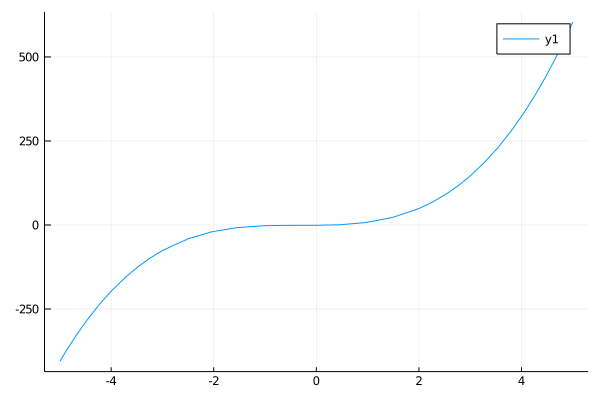

In [12]:
xmin = -5.0
xmax = 5.0
plot(h, xmin, xmax)

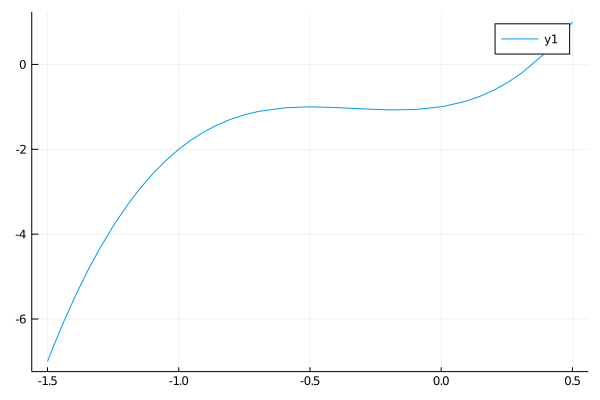

In [17]:
xmin = -1.5
xmax = 0.5
plot(h, xmin, xmax)

La fonction `fzeros` cherche à déterminer tous les zéros d'une fonction, mais peut être assez lente. Nous chercherons juste un zéro de la fonction, dans l'intervalle $[0,1]$.

In [13]:
?fzero

search: fzero fzeros find_zero find_zeros RoundFromZero finalizer



```
fzero(f, x0; order=0; kwargs...)
fzero(f, x0, M; kwargs...)
fzero(f, x0, M, N; kwargs...)
fzero(f, x0; kwargs...)
fzero(f, a::Number, b::Numbers; kwargs...)
fzero(f, a::Number, b::Numbers; order=?, kwargs...)
fzero(f, fp, a::Number; kwargs...)
```

Find zero of a function using one of several iterative algorithms.

  * `f`: a scalar function or callable object
  * `x0`: an initial guess, a scalar value or tuple of two values
  * `order`: An integer, symbol, or string indicating the algorithm to  use for `find_zero`. The `Order0` default may be specified directly  by `order=0`, `order=:0`, or `order="0"`; `Order1()` by `order=1`,  `order=:1`, `order="1"`, or `order=:secant`; `Order1B()` by  `order="1B"`, etc.
  * `M`: a specific method, as would be passed to `find_zero`, bypassing the use of the `order` keyword
  * `N`: a specific bracketing method. When given, if a bracket is identified, method `N` will be used to finish instead of method `M`.
  * `a`, `b`: When two values are passed along, if no `order` value is specified, `Bisection` will be used over the bracketing interval `(a,b)`. If an `order` value is specified, the value of `x0` will be set to `(a,b)` and the specified method will be used.
  * `fp`: when `fp` is specified (assumed to compute the derivative of `f`), Newton's method will be used
  * `kwargs...`: See `find_zero` for the specification of tolerances and other keyword arguments

Examples:

```
fzero(sin, 3)                  # use Order0() method, the default
fzero(sin, 3, order=:secant)   # use secant method (also just `order=1`)
fzero(sin, 3, Roots.Order1B()) # use secant method variant for multiple roots.
fzero(sin, 3, 4)               # use bisection method over (3,4)
fzero(sin, 3, 4, xatol=1e-6)   # use bisection method until |x_n - x_{n-1}| <= 1e-6
fzero(sin, 3, 3.1, order=1)    # use secant method with x_0=3.0, x_1 = 3.1
fzero(sin, (3, 3.1), order=2)  # use Steffensen's method with x_0=3.0, x_1 = 3.1
fzero(sin, cos, 3)             # use Newton's method
```

Note: unlike `find_zero`, `fzero` does not specialize on the type of the function argument. This has the advantage of making the first use of the function `f` faster, but subsequent uses slower.


In [14]:
fzero(h, 0, 1)

0.3478103847799311

In [15]:
fzeros(h, 0, 1)

1-element Array{Float64,1}:
 0.34781038477993104

Nous retrouvons la même solution que précédemment (heureusement!).

### Méthode de la bisection

Nous pouvons le faire explicitement en codant notre fonction de bisection.

In [26]:
function bisection(f::Function, a::Float64, b::Float64, δ::Float64 = 1e-8)

    k = 0
    (a,b) = (min(a,b),max(a,b))

    fa = f(a)
    fb = f(b)
    if fa == 0
        return k, fa, a, a
    elseif fb == 0
        return k, fb, b, b
    end

    if fa*fb > 0
        println("The function must be of opposite signs at the bounds")
        return
    end

    # fa*fb < 0
    d = b-a

    fc = NaN

    while (d > δ)
        c = a+d/2
        fc = f(c)

        k += 1

        if (verbose)
            println("$k. a = $a, b = $b, d = $d, c = $c, fc = $fc")
        end
        
        if (fc == 0)
            a = b = c
            break
        elseif (fc*fa < 0)
            b = c
            fb = fc
        else
            a = c
            fa = fc
        end
        d = b-a
    end            

    return k, fc, a, b
end

bisection (generic function with 2 methods)

In [27]:
methods(bisection)

# 2 methods for generic function "bisection":
[1] bisection(f::Function, a::Float64, b::Float64) in Main at In[26]:1
[2] bisection(f::Function, a::Float64, b::Float64, δ::Float64) in Main at In[26]:1

In [28]:
verbose = true
X = bisection(df, 0.0, 1.0)

1. a = 0.0, b = 1.0, d = 1.0, c = 0.5, fc = 0.5857864376269051
2. a = 0.0, b = 0.5, d = 0.5, c = 0.25, fc = -0.5
3. a = 0.25, b = 0.5, d = 0.25, c = 0.375, fc = 0.11700683814454771
4. a = 0.25, b = 0.375, d = 0.125, c = 0.3125, fc = -0.1638543819998317
5. a = 0.3125, b = 0.375, d = 0.0625, c = 0.34375, fc = -0.018105730844883317
6. a = 0.34375, b = 0.375, d = 0.03125, c = 0.359375, fc = 0.050634687543401835
7. a = 0.34375, b = 0.359375, d = 0.015625, c = 0.3515625, fc = 0.016576914576864388
8. a = 0.34375, b = 0.3515625, d = 0.0078125, c = 0.34765625, fc = -0.0006841080101760433
9. a = 0.34765625, b = 0.3515625, d = 0.00390625, c = 0.349609375, fc = 0.007966197738592307
10. a = 0.34765625, b = 0.349609375, d = 0.001953125, c = 0.3486328125, fc = 0.00364602812011805
11. a = 0.34765625, b = 0.3486328125, d = 0.0009765625, c = 0.34814453125, fc = 0.0014822102363964973
12. a = 0.34765625, b = 0.34814453125, d = 0.00048828125, c = 0.347900390625, fc = 0.0003993642067436909
13. a = 0.3476562

(27, -2.0497655794926573e-8, 0.34781038016080856, 0.34781038761138916)

In [29]:
X = bisection(df, 0.0, 1.0, 1e-11)

1. a = 0.0, b = 1.0, d = 1.0, c = 0.5, fc = 0.5857864376269051
2. a = 0.0, b = 0.5, d = 0.5, c = 0.25, fc = -0.5
3. a = 0.25, b = 0.5, d = 0.25, c = 0.375, fc = 0.11700683814454771
4. a = 0.25, b = 0.375, d = 0.125, c = 0.3125, fc = -0.1638543819998317
5. a = 0.3125, b = 0.375, d = 0.0625, c = 0.34375, fc = -0.018105730844883317
6. a = 0.34375, b = 0.375, d = 0.03125, c = 0.359375, fc = 0.050634687543401835
7. a = 0.34375, b = 0.359375, d = 0.015625, c = 0.3515625, fc = 0.016576914576864388
8. a = 0.34375, b = 0.3515625, d = 0.0078125, c = 0.34765625, fc = -0.0006841080101760433
9. a = 0.34765625, b = 0.3515625, d = 0.00390625, c = 0.349609375, fc = 0.007966197738592307
10. a = 0.34765625, b = 0.349609375, d = 0.001953125, c = 0.3486328125, fc = 0.00364602812011805
11. a = 0.34765625, b = 0.3486328125, d = 0.0009765625, c = 0.34814453125, fc = 0.0014822102363964973
12. a = 0.34765625, b = 0.34814453125, d = 0.00048828125, c = 0.347900390625, fc = 0.0003993642067436909
13. a = 0.3476562

(37, 4.92828000631107e-12, 0.3478103847737657, 0.34781038478104165)

### Méthode de Newton

La dérivée seconde de $f$ est
$$
f''(x) = 2+\frac{1}{2}x^{-\frac{3}{2}}.
$$

In [31]:
function d2f(x::Float64)
    return 2+x^(-3/2)/2
end

d2f (generic function with 1 method)

Une implémentation basique de la méthode de Newton suit.

In [32]:
function Newton(f::Function, df::Function, d2f:: Function, xstart::Float64, δ::Float64 = 1e-8, nmax::Int64 = 100)
    k = 1
    x = xstart
    if (verbose)
        fx = f(x)
        println("$k. x = $x, f(x) = $fx")
    end
    dfx = df(x)
    while (abs(dfx) > δ && k <= nmax)
        k += 1
        dfx = df(x)
        x -= dfx/d2f(x)
        if (verbose)
            fx = f(x)
            println("$k. x = $x, f(x) = $fx")
        end
    end
end

Newton (generic function with 3 methods)

In [33]:
verbose = true
Newton(f, df, d2f, 0.1)

1. x = 0.1, f(x) = -0.5224555320336759
2. x = 0.2101698321896462, f(x) = -0.6625444777611704
3. x = 0.31601466047275417, f(x) = -0.7084236992061186
4. x = 0.3465158588881345, f(x) = -0.71072285402286
5. x = 0.3478083935817193, f(x) = -0.7107265760534248
6. x = 0.3478103847752347, f(x) = -0.7107265760622221
7. x = 0.347810384779931, f(x) = -0.7107265760622221


In [34]:
Newton(f, df, d2f, 0.1, 1e-11)

1. x = 0.1, f(x) = -0.5224555320336759
2. x = 0.2101698321896462, f(x) = -0.6625444777611704
3. x = 0.31601466047275417, f(x) = -0.7084236992061186
4. x = 0.3465158588881345, f(x) = -0.71072285402286
5. x = 0.3478083935817193, f(x) = -0.7107265760534248
6. x = 0.3478103847752347, f(x) = -0.7107265760622221
7. x = 0.347810384779931, f(x) = -0.7107265760622221
8. x = 0.34781038477993104, f(x) = -0.710726576062222


In [37]:
verbose = true
Newton(f, df, d2f, 100.0)

1. x = 100.0, f(x) = 10080.0


LoadError: DomainError with -0.42489377655586225:
sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

In [38]:
x0 = 3.0
x1 = x0-df(x0)/d2f(x0)

-0.06391231539941522

Nous voyons que nous convergeons plus rapidement vers la solution optimale quand la méthode fonctionne, mais selon le point de départ, elle peut échouer lamentablement.

In [39]:
function Newton(df::Function, d2f:: Function, xstart::Float64, δ::Float64 = 1e-8, nmax::Int64 = 100)
    k = 1
    x = xstart
    dfx = df(x)
    while (abs(dfx) > δ && k <= nmax)
        k += 1
        dfx = df(x)
        x -= dfx/d2f(x)
    end
end

Newton (generic function with 6 methods)

## Différentiation numérique

Il n'est pas toujours facile de calculer explicitement la dérivée d'une fonction. Il est cependant possible d'exploiter la définition de dérivée afin de l'approximer numériquement. Soit $f$, dérivable en $x$. La dérivée est définie comme
$$
    f'(x) = \lim_{\epsilon \rightarrow 0} \frac{f(x+\epsilon)-f(x)}{\epsilon}
$$
Nous pouvons dès lors approximer la dérivée en choisissant $\epsilon$ assez petit et en calculant par exemple
$$
f'(x) \approx \frac{f(x+\epsilon)-f(x)}{\epsilon}.
$$

In [40]:
ϵ = 1e-4
dffd(x) = (f(x+ϵ)-f(x))/ϵ

dffd (generic function with 1 method)

L'application de la méthode de la bisection à cette approximation permet d'obtenir

In [41]:
fzero(dffd, 0, 1)

0.3477603857669904

In [42]:
ϵ = 1e-12
fzero(dffd, 0, 1)

0.3478052616119385

Nous ne pouvons choisir $\epsilon$ arbitrairement petit, comme illustré ci-dessous.

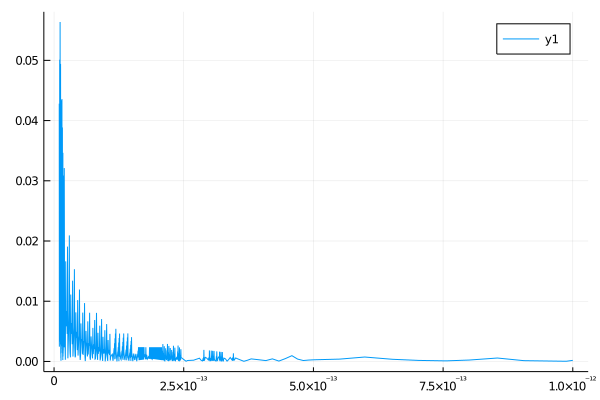

In [43]:
# fd: Finite difference
dffd(x, ϵ) = (f(x+ϵ)-f(x))/ϵ
x = 1.0
errfd(ϵ) = abs(df(x)-dffd(x, ϵ))
plot(errfd, 1e-14,1e-12)

In [44]:
ϵ = 1e-15
fzero(dffd, 0, 1)

0.3753662109375

La méthode peut être affinée en utilisant la différence centrale, définie comme
$$
f'(x) \approx \frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}
$$

Cette formule est obtenue en considérant
$$
    f'(x) = \lim_{\epsilon \rightarrow 0} \frac{f(x+\epsilon)-f(x)}{\epsilon}
$$
et
$$
    f'(x) = \lim_{\epsilon \rightarrow 0} \frac{f(x)-f(x-\epsilon)}{\epsilon}
$$

In [47]:
dfcd(x, ϵ=1e-6) = (f(x+ϵ)-f(x-ϵ))/(2*ϵ)

dfcd (generic function with 2 methods)

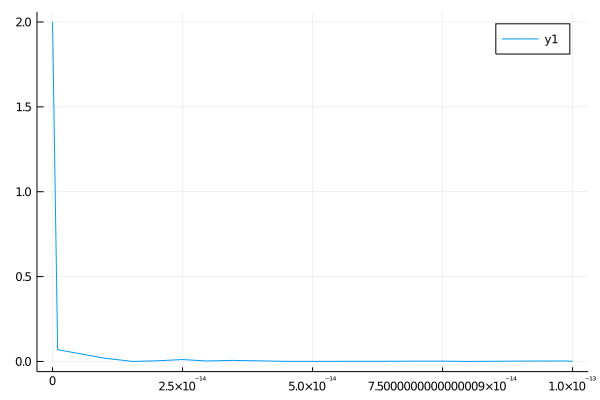

In [48]:
x = 1.0
errcd(ϵ) = abs(df(x)-dfcd(x, ϵ))
plot(errcd, 1e-18,0.1e-12)

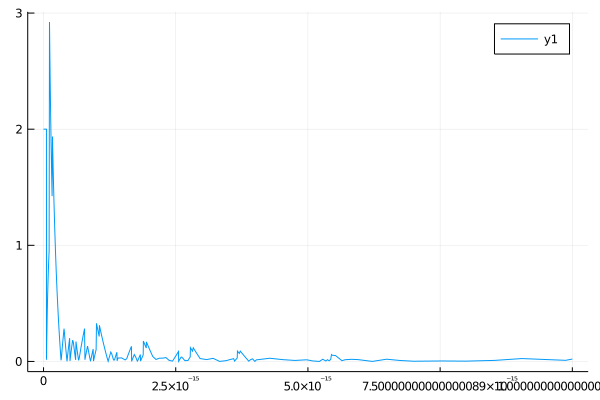

In [49]:
plot(errcd, 1e-18,0.1e-13)

In [51]:
ϵ = 1e-15
dfcd2(x) = (f(x+ϵ)-f(x-ϵ))/(2*ϵ)
fzero(dfcd2, 0.2, 0.5)

0.346875

La différence centrale fournit de plus petites erreurs numériques, mais au prix d'une évaluation de fonction supplémentaire.

Les dérivées numériques sont souvent coûteuses à calculer, surtout pour des problèmes multivariés, et nous nous tournerons vers la différentiation automatique.

In [52]:
Newton(f, dfcd, d2f, 1.1)

1. x = 1.1, f(x) = 0.21238230365969724
2. x = 0.17678773862630892, f(x) = -0.6328810373010464
3. x = 0.2942185128994119, f(x) = -0.7040552143383558
4. x = 0.34392708747069356, f(x) = -0.7106930135038015
5. x = 0.34779235362665795, f(x) = -0.7107265753408357
6. x = 0.3478103843909892, f(x) = -0.7107265760622221
7. x = 0.34781038477877974, f(x) = -0.7107265760622219


In [53]:
dfhd(x, ϵ=1e-4) = (dfcd(x+ϵ)-dfcd(x))/ϵ

dfhd (generic function with 2 methods)

In [54]:
Newton(f, dfcd, dfhd, 1.1)

1. x = 1.1, f(x) = 0.21238230365969724
2. x = 0.17677563355014392, f(x) = -0.6328686318097565
3. x = 0.29424761704081137, f(x) = -0.7040626382540115
4. x = 0.343939312993119, f(x) = -0.7106932248221285
5. x = 0.3477929328575259, f(x) = -0.7107265753864391
6. x = 0.34781038647043694, f(x) = -0.7107265760622221
7. x = 0.34781038479398285, f(x) = -0.7107265760622219


Utilisons à présent la différentiation automatique.

In [55]:
using ForwardDiff

  Resolving package versions...
Updating `C:\Users\slash\.julia\environments\v1.5\Project.toml`
  [f6369f11] + ForwardDiff v0.10.12
No Changes to `C:\Users\slash\.julia\environments\v1.5\Manifest.toml`


In [56]:
g2 = x -> ForwardDiff.derivative(f, x)

#1 (generic function with 1 method)

In [57]:
Newton(f, g2, dfhd, 1.1)

1. x = 1.1, f(x) = 0.21238230365969724
2. x = 0.17677563346369074, f(x) = -0.6328686317211533
3. x = 0.2942476245134814, f(x) = -0.70406264015959
4. x = 0.3439393183705949, f(x) = -0.7106932249149309
5. x = 0.34779293286432433, f(x) = -0.7107265753864397
6. x = 0.34781038649273033, f(x) = -0.7107265760622221
7. x = 0.34781038477972825, f(x) = -0.7107265760622221


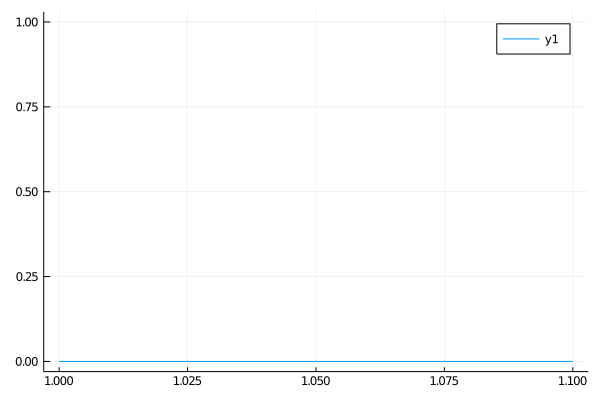

In [58]:
errfd(x) = abs(df(x)-g2(x))
plot(errfd, 1,1.1)